# EDA

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from global_params import fid

In [2]:
#%matplotlib inline

## Global parameters

In [3]:
target_dataset_path = join('..', 'datasets', '224x224_anim10')
train_dataset = join(target_dataset_path, 'train')
test_dataset = join(target_dataset_path, 'test')

## 1. Compile pandas db

In [4]:
def get_XY(X: pd.DataFrame, Y: pd.DataFrame):
    XY = pd.concat([X, Y], axis=1)
    XY = XY.reset_index(drop=True)
    return XY

def get_fire_X(X: pd.DataFrame, Y: pd.DataFrame):
    XY = pd.concat([X, Y], axis=1)
    XY = XY.loc[XY['Y'] > 0]
    XY = XY.reset_index(drop=True)
    return XY.drop(columns=['Y'])

def get_fire_Y(Y: pd.DataFrame):
    fire_Y = Y.loc[Y['Y'] > 0]
    return fire_Y.reset_index(drop=True)

### Train db

In [5]:
train_X = pd.DataFrame(np.load(join(train_dataset, 'features.npy')), columns=fid.keys())
train_X

,b,g,r,ema_b,ema_g,ema_r,dma_b_0.5,dma_g_0.5,dma_r_0.5,dma_b_0.75,dma_g_0.75,dma_r_0.75,dma_b_0.9,dma_g_0.9,dma_r_0.9
0,0.913725,0.886275,0.807843,0.884663,0.831311,0.744672,0.066072,0.078291,0.077805,0.040906,0.062120,0.066997,0.032910,0.057407,0.064350
1,0.933333,0.890196,0.811765,0.895532,0.830878,0.742001,0.070454,0.079889,0.081438,0.047332,0.065411,0.073057,0.040734,0.061441,0.070990
2,0.960784,0.894118,0.819608,0.914391,0.823866,0.733950,0.079901,0.086490,0.093336,0.058002,0.075325,0.089374,0.050545,0.072212,0.087544
3,0.976471,0.874510,0.780392,0.913158,0.801103,0.691269,0.086984,0.085868,0.092706,0.070380,0.077373,0.092038,0.065865,0.075226,0.091142
4,0.949020,0.815686,0.698039,0.901117,0.758435,0.627978,0.078156,0.073452,0.076754,0.057708,0.062249,0.073697,0.051488,0.059344,0.072243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12142587,0.670588,0.827451,0.964706,0.634799,0.779938,0.911989,0.055281,0.071190,0.079530,0.041775,0.055339,0.060422,0.037886,0.050375,0.055196
12142588,0.658824,0.827451,0.956863,0.620481,0.775122,0.900050,0.054848,0.072244,0.081227,0.042578,0.057811,0.063378,0.039711,0.054180,0.058917
12142589,0.662745,0.850980,0.960784,0.626301,0.799650,0.909426,0.052191,0.070849,0.075906,0.039510,0.055719,0.056743,0.037124,0.052524,0.052688
12142590,0.650980,0.839216,0.949020,0.618593,0.794098,0.900302,0.053262,0.070640,0.077769,0.039459,0.053608,0.057917,0.035034,0.048242,0.051999


In [6]:
train_X.describe()

,b,g,r,ema_b,ema_g,ema_r,dma_b_0.5,dma_g_0.5,dma_r_0.5,dma_b_0.75,dma_g_0.75,dma_r_0.75,dma_b_0.9,dma_g_0.9,dma_r_0.9
count,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07,1.214259e+07
mean,4.143203e-01,4.447966e-01,4.874422e-01,3.901628e-01,4.190212e-01,4.595481e-01,4.812289e-02,5.093806e-02,5.397430e-02,4.049952e-02,4.271185e-02,4.492645e-02,3.833677e-02,4.040488e-02,4.241680e-02
std,2.515839e-01,2.501174e-01,2.634544e-01,2.287450e-01,2.267418e-01,2.398944e-01,4.025848e-02,4.133270e-02,4.164659e-02,4.186089e-02,4.332866e-02,4.352501e-02,4.299175e-02,4.461219e-02,4.486415e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.156863e-01,2.470588e-01,2.745098e-01,2.125020e-01,2.400977e-01,2.675883e-01,2.209566e-02,2.417830e-02,2.633134e-02,1.568361e-02,1.714218e-02,1.856154e-02,1.366170e-02,1.502420e-02,1.621138e-02
50%,3.686275e-01,4.117647e-01,4.588235e-01,3.508623e-01,3.906231e-01,4.368729e-01,3.879100e-02,4.211031e-02,4.536717e-02,2.977402e-02,3.217391e-02,3.433163e-02,2.727636e-02,2.941616e-02,3.131247e-02
75%,5.764706e-01,6.313726e-01,6.862745e-01,5.342219e-01,5.835374e-01,6.363398e-01,6.109308e-02,6.431990e-02,6.966254e-02,5.008488e-02,5.140533e-02,5.539580e-02,4.704768e-02,4.795682e-02,5.148570e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,9.436865e-01,9.436865e-01,9.436865e-01,4.459429e-01,4.361372e-01,4.403133e-01,5.252610e-01,5.170822e-01,5.205501e-01,6.006356e-01,5.902160e-01,6.118112e-01


In [7]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12142592 entries, 0 to 12142591
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   b           float32
 1   g           float32
 2   r           float32
 3   ema_b       float32
 4   ema_g       float32
 5   ema_r       float32
 6   dma_b_0.5   float32
 7   dma_g_0.5   float32
 8   dma_r_0.5   float32
 9   dma_b_0.75  float32
 10  dma_g_0.75  float32
 11  dma_r_0.75  float32
 12  dma_b_0.9   float32
 13  dma_g_0.9   float32
 14  dma_r_0.9   float32
dtypes: float32(15)
memory usage: 694.8 MB


In [8]:
train_Y = pd.DataFrame(np.load(join(train_dataset, 'output.npy')))
train_Y.columns = ['Y']
train_Y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
12142587,0
12142588,0
12142589,0
12142590,0


In [9]:
train_XY = get_XY(train_X, train_Y)
train_XY.drop_duplicates(inplace=True)
train_XY.describe()

,b,g,r,ema_b,ema_g,ema_r,dma_b_0.5,dma_g_0.5,dma_r_0.5,dma_b_0.75,dma_g_0.75,dma_r_0.75,dma_b_0.9,dma_g_0.9,dma_r_0.9,Y
count,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07,1.092492e+07
mean,4.142537e-01,4.491621e-01,4.978132e-01,3.900627e-01,4.230930e-01,4.692875e-01,4.882016e-02,5.189076e-02,5.528444e-02,4.122025e-02,4.360292e-02,4.605627e-02,3.905345e-02,4.127137e-02,4.349403e-02,4.288894e-02
std,2.435167e-01,2.441971e-01,2.588797e-01,2.202624e-01,2.204486e-01,2.350256e-01,4.085679e-02,4.171923e-02,4.182228e-02,4.278370e-02,4.397084e-02,4.396749e-02,4.401701e-02,4.532635e-02,4.538444e-02,2.780054e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.235294e-01,2.549020e-01,2.862745e-01,2.184895e-01,2.483655e-01,2.804337e-01,2.279074e-02,2.499232e-02,2.745476e-02,1.617075e-02,1.772497e-02,1.937286e-02,1.409044e-02,1.554917e-02,1.694084e-02,0.000000e+00
50%,3.725490e-01,4.156863e-01,4.705882e-01,3.554813e-01,3.954760e-01,4.473894e-01,3.919843e-02,4.263864e-02,4.655183e-02,3.005270e-02,3.257625e-02,3.526574e-02,2.752078e-02,2.978714e-02,3.217166e-02,0.000000e+00
75%,5.725490e-01,6.274510e-01,6.941177e-01,5.304455e-01,5.816073e-01,6.428233e-01,6.077680e-02,6.468503e-02,7.066451e-02,4.988413e-02,5.186398e-02,5.620955e-02,4.686673e-02,4.843104e-02,5.227704e-02,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,9.436865e-01,9.436865e-01,9.436865e-01,4.459429e-01,4.361372e-01,4.403133e-01,5.252610e-01,5.170822e-01,5.205501e-01,6.006356e-01,5.902160e-01,6.118112e-01,3.000000e+00


In [10]:
train_fire_X = get_fire_X(train_X, train_Y)
print(train_fire_X)
train_fire_Y = get_fire_Y(train_Y)
print(train_fire_Y)

               b         g         r     ema_b     ema_g     ema_r  dma_b_0.5  \
0       0.458824  0.400000  0.482353  0.439415  0.393997  0.459618   0.034571   
1       0.556863  0.509804  0.627451  0.525968  0.493433  0.568052   0.055649   
2       0.466667  0.423529  0.501961  0.445977  0.412403  0.491135   0.034550   
3       0.556863  0.517647  0.607843  0.518784  0.489005  0.567905   0.056354   
4       0.647059  0.615686  0.737255  0.604634  0.584858  0.667215   0.055325   
...          ...       ...       ...       ...       ...       ...        ...   
331989  0.600000  0.980392  1.000000  0.541826  0.761837  0.897993   0.070423   
331990  0.549020  0.992157  1.000000  0.520905  0.751880  0.887315   0.050835   
331991  0.615686  0.988235  1.000000  0.531537  0.732492  0.862814   0.097422   
331992  0.525490  0.984314  0.980392  0.540517  0.757917  0.890533   0.044371   
331993  0.529412  1.000000  0.984314  0.521329  0.733431  0.864428   0.041831   

        dma_g_0.5  dma_r_0.

### Test db

In [11]:
test_X = pd.DataFrame(np.load(join(test_dataset, 'features.npy')), columns=fid.keys())
test_X

,b,g,r,ema_b,ema_g,ema_r,dma_b_0.5,dma_g_0.5,dma_r_0.5,dma_b_0.75,dma_g_0.75,dma_r_0.75,dma_b_0.9,dma_g_0.9,dma_r_0.9
0,0.541176,0.509804,0.482353,0.518122,0.492478,0.479450,0.045858,0.039666,0.033767,0.032456,0.025905,0.015071,0.026861,0.020641,0.007450
1,0.541176,0.509804,0.482353,0.517450,0.492590,0.477579,0.046114,0.039573,0.034625,0.032523,0.025299,0.016224,0.027204,0.020206,0.008996
2,0.533333,0.501961,0.474510,0.517162,0.489827,0.471262,0.043311,0.036589,0.033295,0.027730,0.021492,0.015132,0.020872,0.015701,0.007741
3,0.525490,0.494118,0.466667,0.511137,0.486287,0.460174,0.038803,0.031755,0.029857,0.023534,0.015797,0.014194,0.017907,0.010599,0.009180
4,0.533333,0.498039,0.462745,0.513535,0.481929,0.450854,0.039119,0.034201,0.031709,0.025624,0.021116,0.018134,0.021761,0.017641,0.014000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8630267,0.552941,0.600000,0.639216,0.522953,0.567982,0.602824,0.046510,0.049194,0.053364,0.035170,0.036597,0.040893,0.031835,0.033356,0.037788
8630268,0.549020,0.592157,0.623529,0.525825,0.563692,0.596892,0.041455,0.045243,0.046637,0.027975,0.032120,0.031849,0.024590,0.029323,0.028166
8630269,0.568627,0.611765,0.643137,0.531585,0.569451,0.602651,0.050273,0.054061,0.055456,0.040578,0.044723,0.044453,0.038280,0.043013,0.041856
8630270,0.541176,0.584314,0.615686,0.514910,0.549336,0.582052,0.043490,0.049888,0.051049,0.031728,0.039321,0.039341,0.028287,0.036540,0.035846


In [12]:
test_X.describe()

,b,g,r,ema_b,ema_g,ema_r,dma_b_0.5,dma_g_0.5,dma_r_0.5,dma_b_0.75,dma_g_0.75,dma_r_0.75,dma_b_0.9,dma_g_0.9,dma_r_0.9
count,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06,8.630272e+06
mean,3.553499e-01,3.971901e-01,4.666350e-01,3.349053e-01,3.741578e-01,4.402692e-01,4.357883e-02,4.799074e-02,5.136714e-02,3.697999e-02,4.064703e-02,4.257385e-02,3.500218e-02,3.847132e-02,4.005585e-02
std,2.509374e-01,2.566248e-01,2.865582e-01,2.290107e-01,2.329877e-01,2.630065e-01,3.963060e-02,4.284509e-02,4.118551e-02,4.063462e-02,4.413193e-02,4.176827e-02,4.133111e-02,4.489198e-02,4.238744e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.568628e-01,1.921569e-01,2.431373e-01,1.553040e-01,1.917860e-01,2.373315e-01,1.870273e-02,2.114577e-02,2.410956e-02,1.249130e-02,1.401993e-02,1.581170e-02,1.032670e-02,1.169590e-02,1.317653e-02
50%,3.176471e-01,3.764706e-01,4.588235e-01,3.011545e-01,3.589330e-01,4.355135e-01,3.568821e-02,3.972639e-02,4.397948e-02,2.732572e-02,3.018434e-02,3.295482e-02,2.491659e-02,2.749679e-02,2.990571e-02
75%,5.294118e-01,5.843138e-01,6.745098e-01,4.918215e-01,5.422680e-01,6.296899e-01,5.681916e-02,6.155664e-02,6.859126e-02,4.748959e-02,5.103823e-02,5.571253e-02,4.489703e-02,4.795185e-02,5.211467e-02
max,1.000000e+00,1.000000e+00,1.000000e+00,9.436865e-01,9.436865e-01,9.436865e-01,4.475310e-01,4.402505e-01,4.453958e-01,5.452813e-01,5.485497e-01,5.525862e-01,6.481435e-01,6.521380e-01,6.522865e-01


In [13]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630272 entries, 0 to 8630271
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   b           float32
 1   g           float32
 2   r           float32
 3   ema_b       float32
 4   ema_g       float32
 5   ema_r       float32
 6   dma_b_0.5   float32
 7   dma_g_0.5   float32
 8   dma_r_0.5   float32
 9   dma_b_0.75  float32
 10  dma_g_0.75  float32
 11  dma_r_0.75  float32
 12  dma_b_0.9   float32
 13  dma_g_0.9   float32
 14  dma_r_0.9   float32
dtypes: float32(15)
memory usage: 493.8 MB


In [14]:
test_Y = pd.DataFrame(np.load(join(test_dataset, 'output.npy')))
test_Y.columns = ['Y']
test_Y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
8630267,0
8630268,0
8630269,0
8630270,0


In [15]:
test_fire_X = get_fire_X(test_X, test_Y)
print(train_fire_X)
test_fire_Y = get_fire_Y(test_Y)
print(test_fire_Y)

               b         g         r     ema_b     ema_g     ema_r  dma_b_0.5  \
0       0.458824  0.400000  0.482353  0.439415  0.393997  0.459618   0.034571   
1       0.556863  0.509804  0.627451  0.525968  0.493433  0.568052   0.055649   
2       0.466667  0.423529  0.501961  0.445977  0.412403  0.491135   0.034550   
3       0.556863  0.517647  0.607843  0.518784  0.489005  0.567905   0.056354   
4       0.647059  0.615686  0.737255  0.604634  0.584858  0.667215   0.055325   
...          ...       ...       ...       ...       ...       ...        ...   
331989  0.600000  0.980392  1.000000  0.541826  0.761837  0.897993   0.070423   
331990  0.549020  0.992157  1.000000  0.520905  0.751880  0.887315   0.050835   
331991  0.615686  0.988235  1.000000  0.531537  0.732492  0.862814   0.097422   
331992  0.525490  0.984314  0.980392  0.540517  0.757917  0.890533   0.044371   
331993  0.529412  1.000000  0.984314  0.521329  0.733431  0.864428   0.041831   

        dma_g_0.5  dma_r_0.

## 2. Correlation matrix

In [16]:
def visualize_corr_matrix(title: str, X: pd.DataFrame):
    corr = X.corr()
    corr = np.round(corr, 2)
    plt.figure(figsize=[15,15])
    sns.heatmap(corr, annot=True, linewidth=.5, cmap='coolwarm')
    plt.title(title)
    plt.show()

### Train

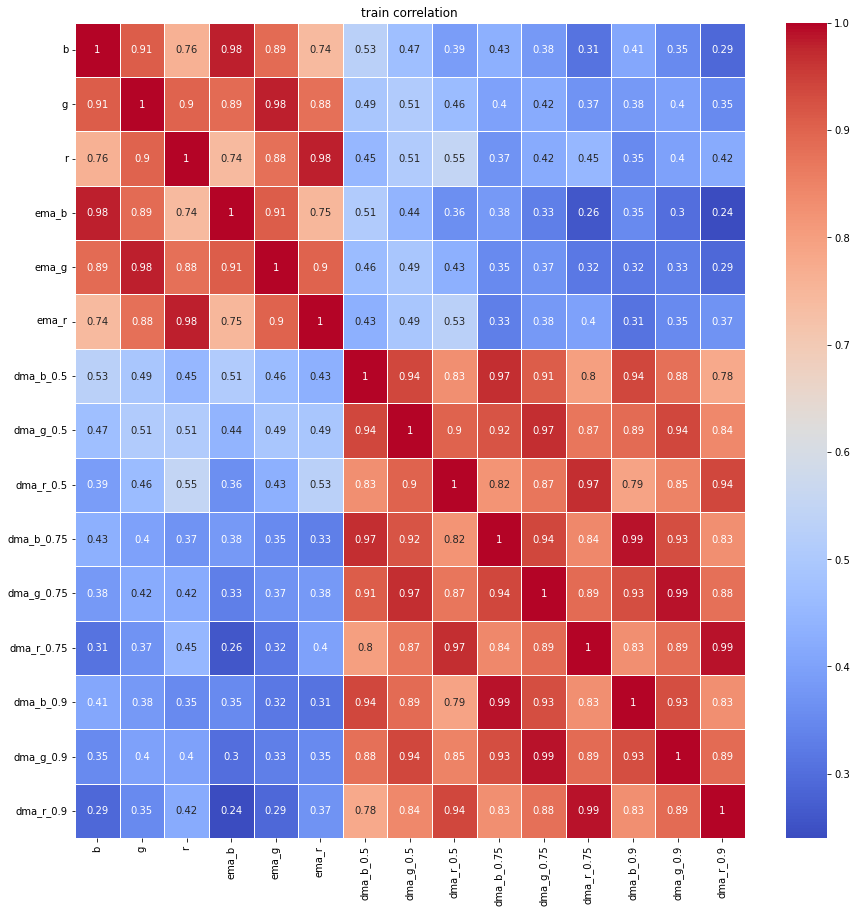

In [17]:
visualize_corr_matrix('train correlation', train_X)

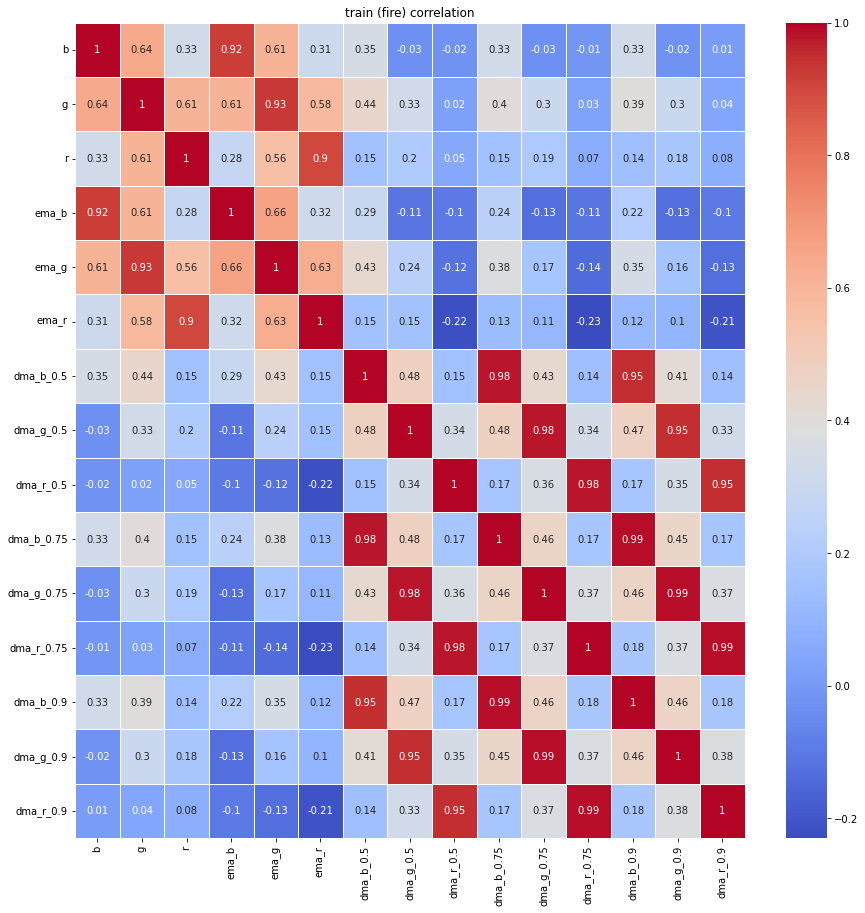

In [18]:
visualize_corr_matrix('train (fire) correlation', test_fire_X)

### Test

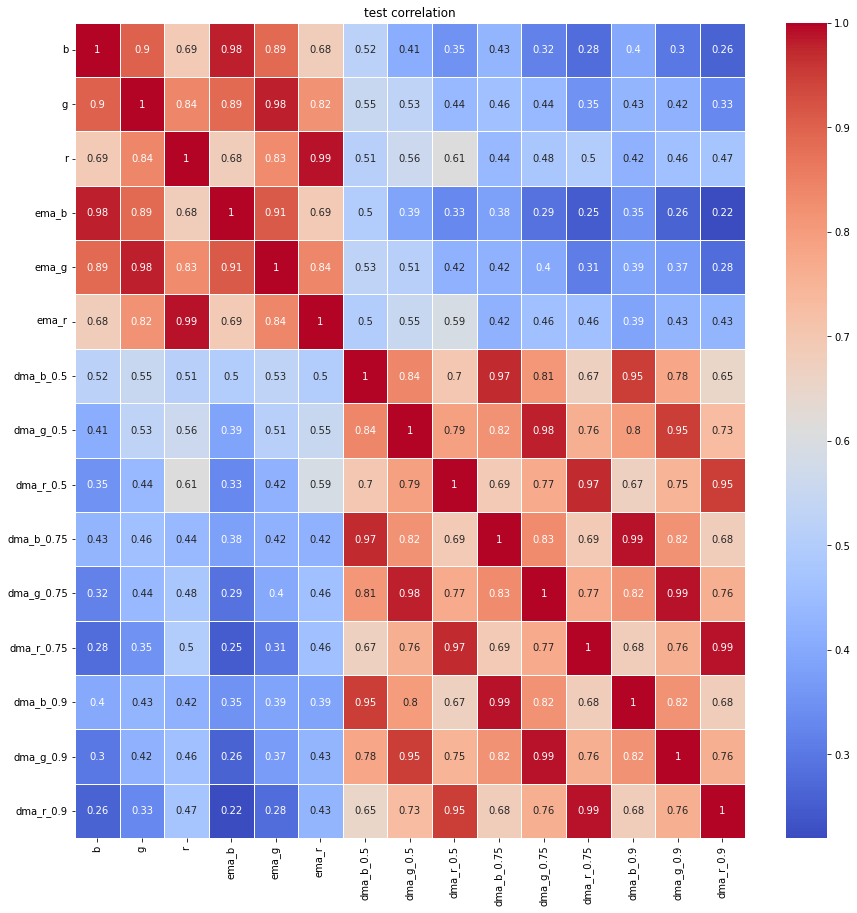

In [19]:
visualize_corr_matrix('test correlation', test_X)

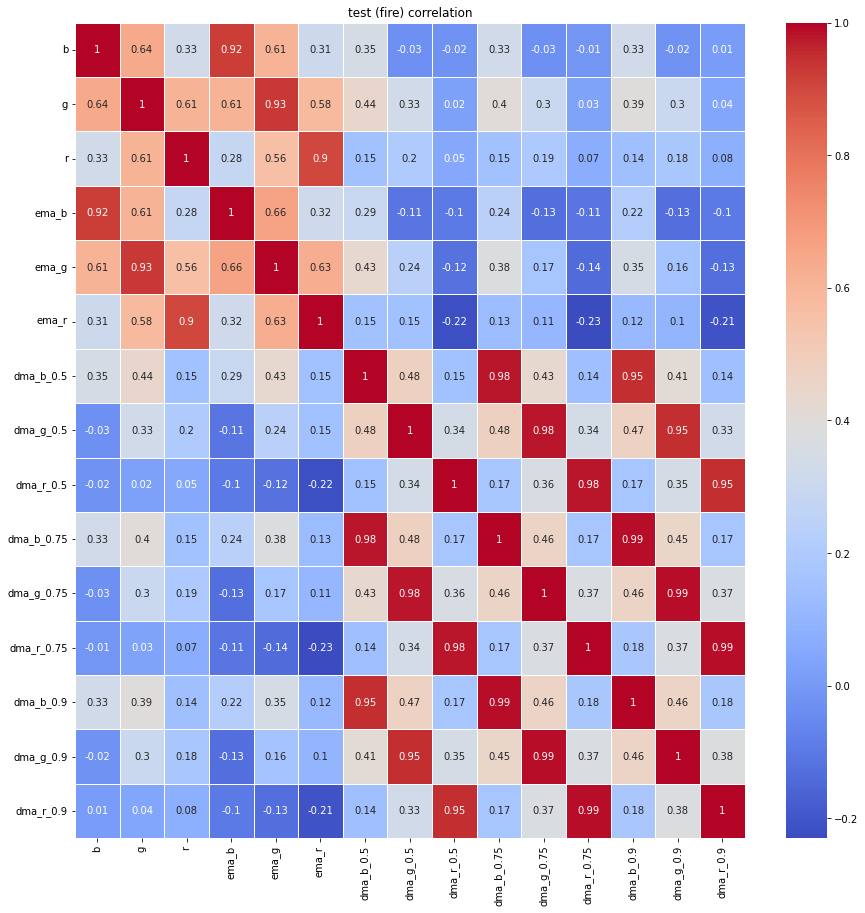

In [20]:
visualize_corr_matrix('test (fire) correlation', test_fire_X)

#### Conclusion - strong linear correlation between BGR colors and their differential chars (ema, dma)
#### Reducing parameters does not make sence  as well as usage linear classification models
#### -> Try knn, decision tree methods

## 3. Class labels barcharts

In [21]:
def visualize_class_labels(title: str, Y: pd.DataFrame):
    counts = Y.value_counts(normalize=True)
    plt.figure(figsize=[8,8])
    plt.title(title)
    if Y.min()['Y'] == 0:
        x = ['no-fire', 'red', 'orange', 'yellow']
    else:
        x = ['red', 'orange', 'yellow']
    y = counts.values
    print(counts)
    for i in range(len(x)):
        plt.annotate(f'{np.round(y[i] * 100, 2)}%', xy=(float(i) - 0.15, y[i] + 0.01))
    sns.barplot(x = x, y = y)
    plt.show()

### Train

Y
0    0.972659
1    0.018326
2    0.004959
3    0.004056
dtype: float64


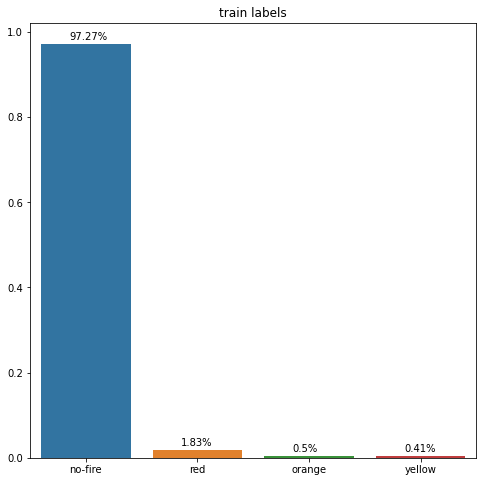

In [22]:
visualize_class_labels('train labels', train_Y)

Y
1    0.670259
2    0.181389
3    0.148352
dtype: float64


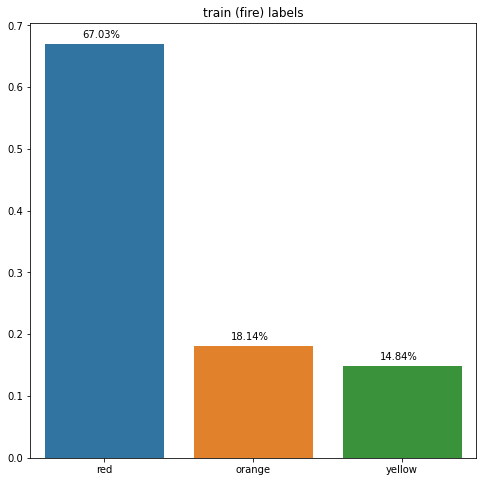

In [23]:
visualize_class_labels('train (fire) labels', train_fire_Y)

### Test

Y
0    0.916935
1    0.054545
3    0.016475
2    0.012046
dtype: float64


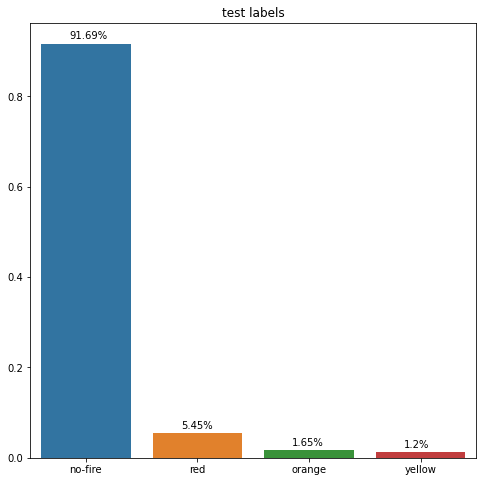

In [24]:
visualize_class_labels('test labels', test_Y)

Y
1    0.656648
3    0.198336
2    0.145016
dtype: float64


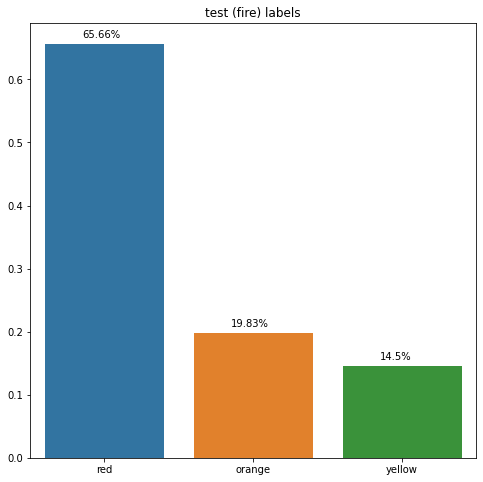

In [25]:
visualize_class_labels('test (fire) labels', test_fire_Y)